In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

%matplotlib widget

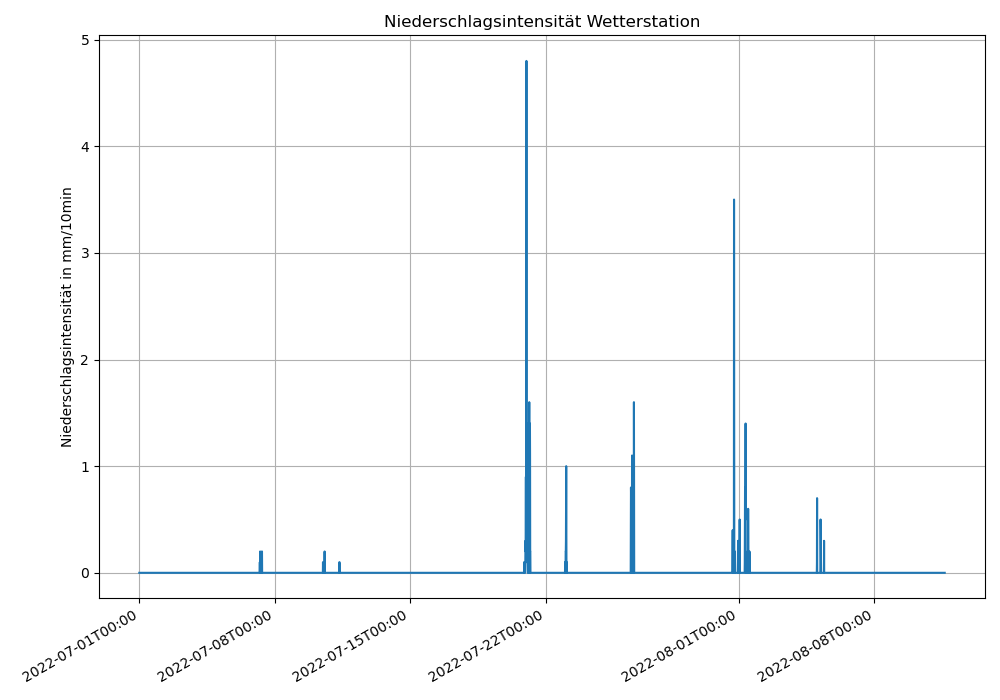

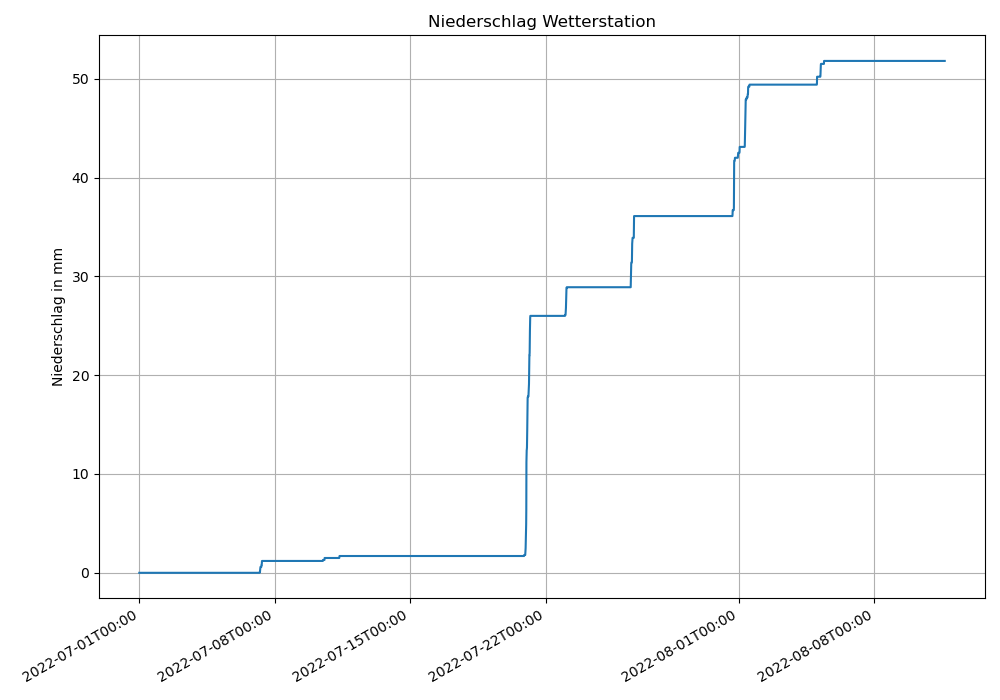

In [2]:
time_ref = np.loadtxt(
    'GeoDach2022_senseBox_Niederschlag.txt',
    skiprows=9,
    dtype=str,
    delimiter='\t',
    usecols=0
)
time_ref = [datetime.strptime(t,"%d.%m.%Y %H:%M") for t in time_ref]

Visibility, WeatherCode, Precipitation, PrecipitationCumulative = np.loadtxt(
    'GeoDach2022_senseBox_Niederschlag.txt',
    skiprows=9,
    delimiter='\t',
    unpack = True,
    usecols=(1,2,3,4)
)

plt.figure(figsize=(10,7))
plt.title('Niederschlagsintensität Wetterstation')
plt.ylabel("Niederschlagsintensität in mm/10min")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%dT%H:%M"))
plt.plot(time_ref,Precipitation)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.grid(which='both')
plt.show()

plt.figure(figsize=(10,7))
plt.title('Niederschlag Wetterstation')
plt.ylabel("Niederschlag in mm")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%dT%H:%M"))
plt.plot(time_ref,PrecipitationCumulative)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.grid(which='both')
plt.show()

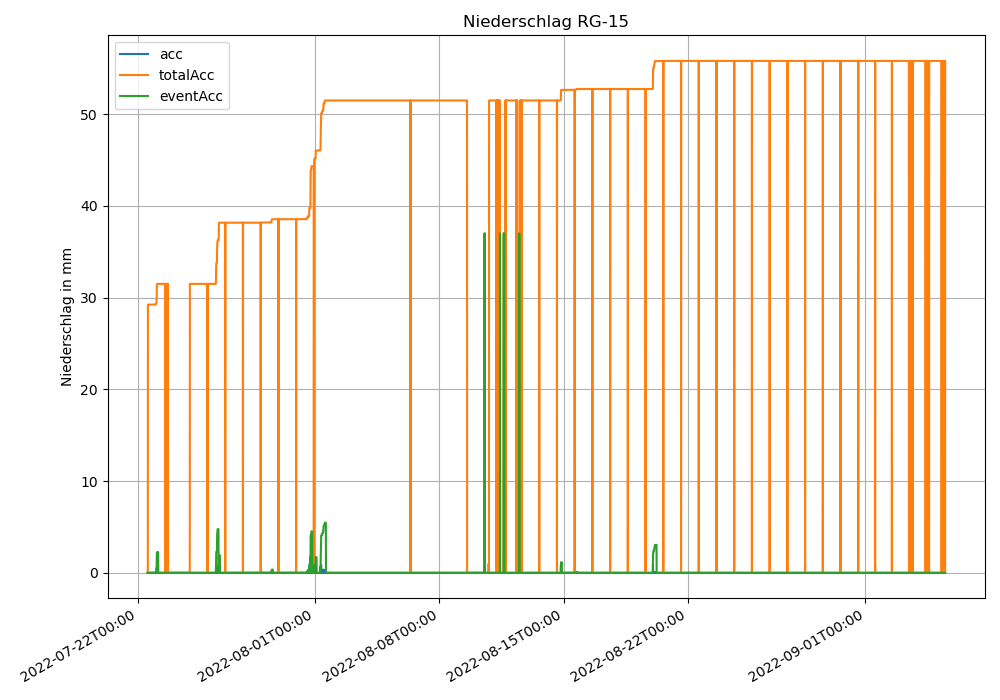

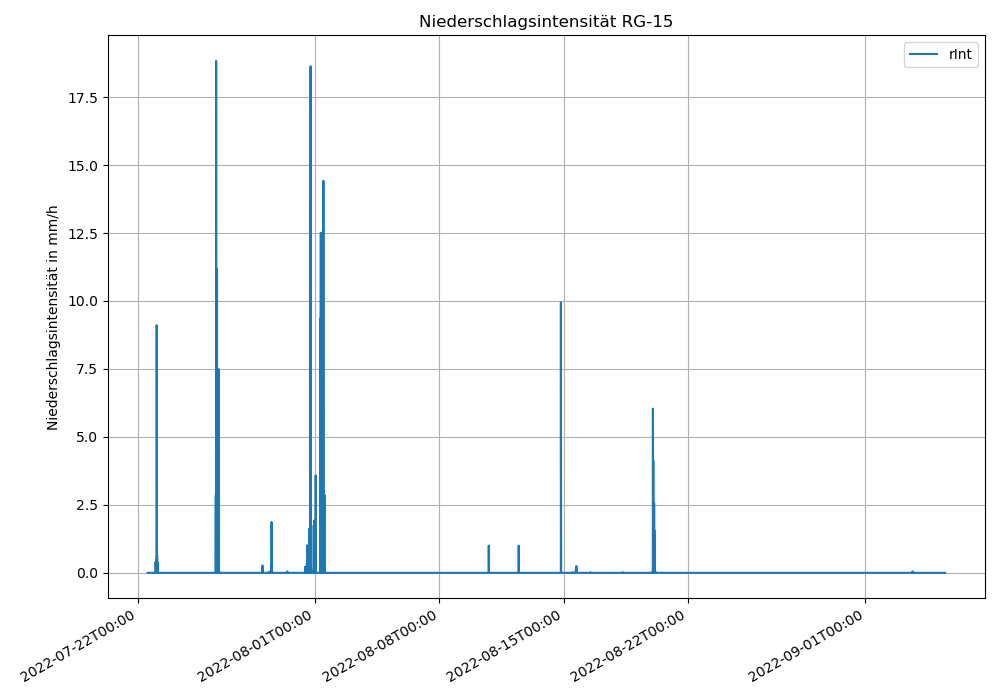

In [3]:
sensorID = np.loadtxt('DATA.TXT', delimiter = ',', dtype = np.str_, usecols=0)
data = np.loadtxt('DATA.TXT', delimiter = ',', usecols=1)
acc = data[sensorID==sensorID[0]]
eventAcc = data[sensorID==sensorID[1]]
totalAcc = data[sensorID==sensorID[2]]
rInt = data[sensorID==sensorID[3]]

time = np.loadtxt('DATA.TXT', delimiter = ',', dtype = str, usecols=2)
time = [datetime.strptime(time[0],"%Y-%m-%dT%H:%M:%SZ")]
time[0] -= timedelta(0, 50*60)
delta = timedelta(0, 5*60)
for i in range(1, len(acc)):
    time.append(time[0] + i * delta)

plt.figure(figsize = (10, 7))
plt.title('Niederschlag RG-15')
plt.ylabel('Niederschlag in mm')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%dT%H:%M"))
#plt.xlim(datetime(2022, 7, 22), datetime(2022, 8, 4))
plt.plot(time, acc, label="acc")
plt.plot(time, totalAcc, label="totalAcc")
plt.plot(time, eventAcc, label="eventAcc")
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.grid(which='both')
plt.savefig('Niederschlag_RG-15.jpg', dpi=200)
plt.show()

plt.figure(figsize = (10, 7))
plt.title('Niederschlagsintensität RG-15')
plt.ylabel('Niederschlagsintensität in mm/h')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%dT%H:%M"))
#plt.xlim(datetime(2022, 7, 22), datetime(2022, 8, 4))
plt.plot(time, rInt, label="rInt")
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.grid(which='both')
plt.savefig('Niederschlagsinensität_RG-15.jpg', dpi=200)
plt.show()

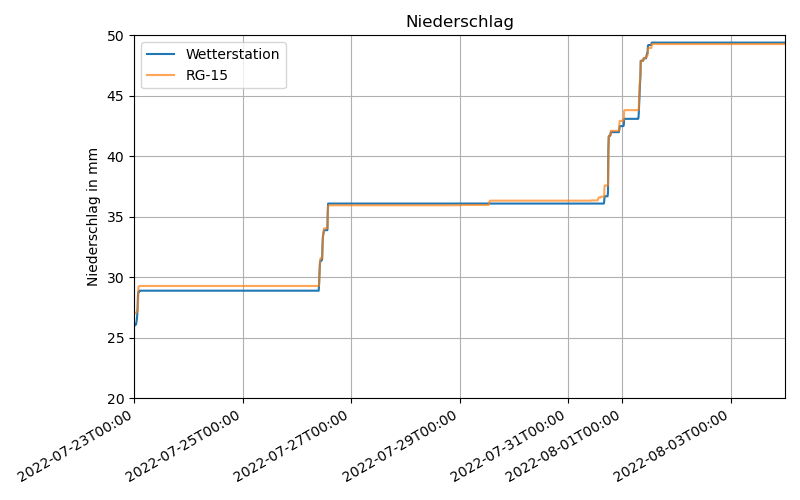

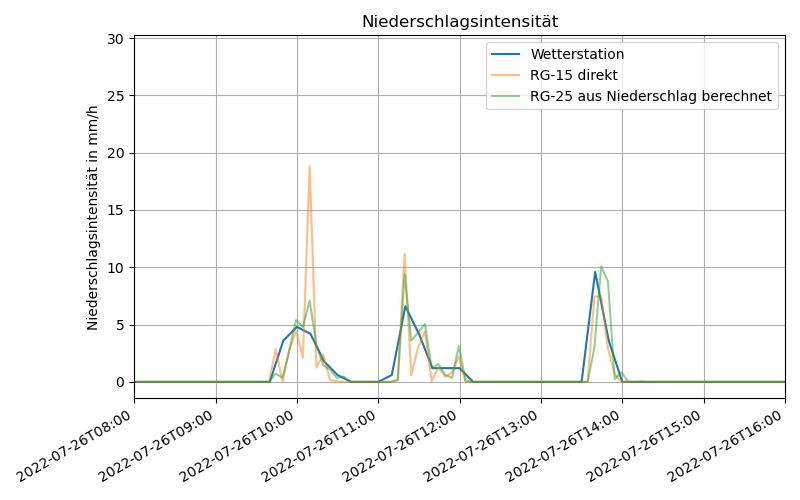

In [5]:
for i in range(1, len(totalAcc)):
    if totalAcc[i] == 0:
        totalAcc[i] = totalAcc[i-1]

plt.figure(figsize = (8, 5))
plt.title('Niederschlag')
plt.ylabel('Niederschlag in mm')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%dT%H:%M"))
plt.xlim(datetime(2022, 7, 23), datetime(2022, 8, 4))
plt.ylim(20,50)
plt.plot(time_ref,PrecipitationCumulative, label='Wetterstation')
plt.plot(time, totalAcc-2.2, label="RG-15", alpha = 0.7)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.grid(which='both')
plt.savefig('Niederschlag.jpg', dpi=200)
plt.show()

plt.figure(figsize = (8, 5))
plt.title('Niederschlagsintensität')
plt.ylabel('Niederschlagsintensität in mm/h')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%dT%H:%M"))
plt.xlim(datetime(2022, 7, 26, 8), datetime(2022, 7, 26, 16))
plt.plot(time_ref,Precipitation*6, label = 'Wetterstation')
plt.plot(time, rInt, label= 'RG-15 direkt', alpha=0.5)
plt.plot(time[1:], np.maximum(0, np.minimum(25, np.diff(totalAcc)*12)), label= 'RG-25 aus Niederschlag berechnet', alpha=0.5)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.grid(which='both')
plt.savefig('Niederschlagsintensität.jpg', dpi=200)
plt.show()

# notes

- default to -1 for debugging
- nullwerte um 40 vor Mitternacht?